In [104]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2

In [105]:
#khondane dataset
dataset = io.loadmat(r'C:\Users\Seyed\Desktop\data set\archive\Data_hoda_full.mat')

In [106]:
type(dataset)

dict

In [107]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [108]:
dataset['Data'].shape

(60000, 1)

In [109]:
np.squeeze(dataset['labels']).shape

(60000,)

In [110]:
new_data = np.squeeze(dataset['Data'])

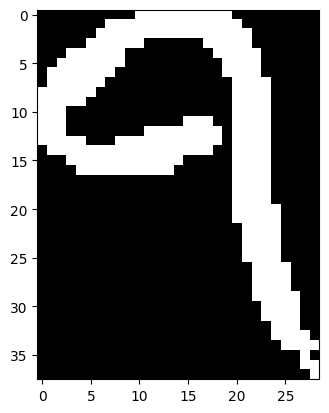

In [111]:
plt.imshow(new_data[59], cmap = 'gray')

In [112]:
#train kardan
x_train_org = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
x_test_org = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

Text(0.5, 1.0, '3')

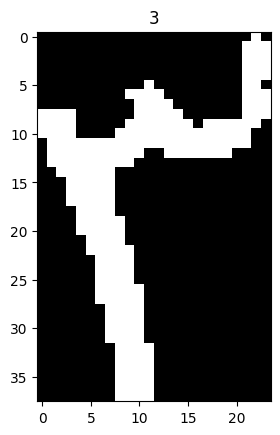

In [113]:
i = 12
plt.imshow(x_train_org[i], cmap = 'gray')
plt.title(y_train[i])

In [114]:
#resize kardan
X_train5 = [cv2.resize(img, dsize=(15, 15)) for img in x_train_org]
X_test5 = [cv2.resize(img, dsize=(15, 15)) for img in x_test_org]

In [115]:
np.shape(X_train5)

(1000, 15, 15)

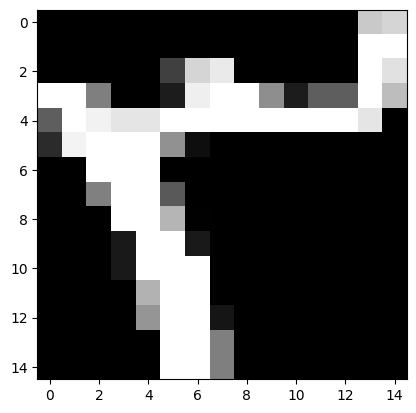

Text(0.5, 1.0, '3')

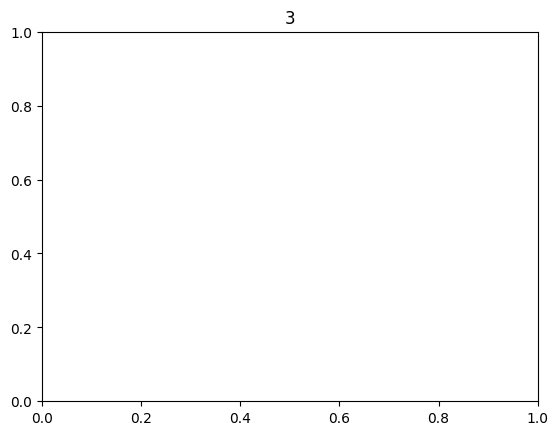

In [116]:
image = X_train5[12]
plt.imshow(image, cmap = 'gray')
plt.show()
plt.title(y_train[12])

In [117]:
#reshape
xtrain = np.reshape(X_train5, [-1, 225])
xtest = np.reshape(X_test5, [-1, 225])

In [118]:
xtrain.shape

(1000, 225)

In [119]:
xtest.shape

(200, 225)

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
xtrain.shape

(1000, 225)

In [122]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [123]:
np.array([xtest[10]]).shape

(1, 225)

In [124]:
i = np.expand_dims(xtest[10], axis=0)

In [125]:
knn.predict(i)

array([0], dtype=uint8)

In [126]:
sample = 24
x = [xtest[sample]]
predicted_class = knn.predict(x)
print ("sample {} is a {}, and you prediction is: {}.".format(sample, y_test[sample], predicted_class[0]))

sample 24 is a 9, and you prediction is: 6.


In [127]:
print(knn.predict_proba(x))

[[0.         0.         0.         0.         0.         0.
  0.66666667 0.         0.         0.33333333]]


In [130]:
np.mean(y_test==kol)

np.float64(0.965)

In [129]:
kol = knn.predict(xtest)
kol

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 2, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 6, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 7, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 6, 6,
       2, 4, 2, 4, 4, 5, 9, 1, 8, 3, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 2, 2, 3, 1, 0, 2, 9, 6, 3, 5, 5, 0, 0, 3,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 0, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 3, 5, 7, 4, 1, 3, 3, 1, 2, 3, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

In [134]:
acc = knn.score(xtest, y_test)
print ("darsad drosti:", (acc*100),"%")

darsad drosti: 96.5 %
